In [43]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [15]:
data = pd.read_html('https://worldtable.info/gosudarstvo/tablica-rozhdaemosti-po-godam-rossija.html', header=0)[0]

In [37]:
data

,Год,Количество родившихся чел.
0,1959,2 796 228
1,1960,2 782 353
2,1961,2 662 135
3,1962,2 482 539
4,1963,2 331 505
...,...,...
58,2017,1 689 884
59,2018,1 599 316
60,2019,1 484 517
61,2020,1 435 750


In [33]:
data.dtypes

Год                            int64
Количество родившихся чел.    object
dtype: object

In [40]:
data['Количество родившихся чел.'] = data['Количество родившихся чел.'].str.replace(' ', '').astype('int')

In [41]:
data.head()

,Год,Количество родившихся чел.
0,1959,2796228
1,1960,2782353
2,1961,2662135
3,1962,2482539
4,1963,2331505


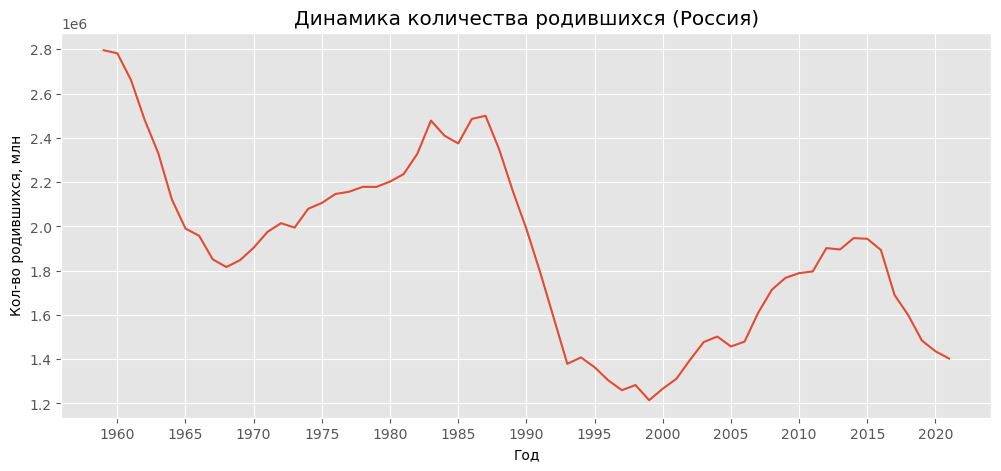

In [55]:
plt.figure(figsize=(12,5))
plt.xticks(range(1960,2021,5))
plt.xlabel('Год')
plt.ylabel('Кол-во родившихся, млн')
plt.title('Динамика количества родившихся (Россия)')
plt.plot(data['Год'],data['Количество родившихся чел.']);

In [109]:
# 2059 и 2020, 2021 не будем брать в расчеты, так как они относятся к другим десятилетиям
data['Десятилетие'] = data['Год'].apply(lambda x: f'{int(x / 10) * 10:.0f}' if x >= 1960 and x <= 2019 else None)

In [110]:
decades = data.dropna().groupby('Десятилетие').sum()['Количество родившихся чел.']

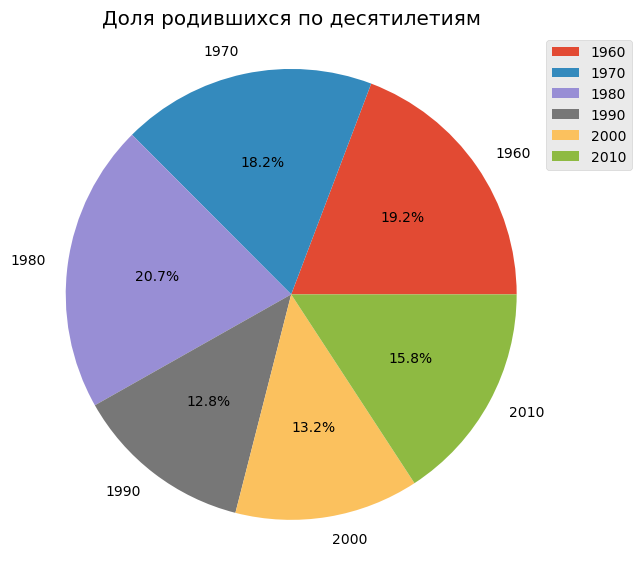

In [111]:
fig1, ax1 = plt.subplots()
plt.subplots_adjust(top=1.2) 

labels = decades.index
wedges, texts, autotexts = ax1.pie(decades, labels=labels, autopct='%1.1f%%')
ax1.set_title('Доля родившихся по десятилетиям')
ax1.axis('equal')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()